## Unit 5 Assignment - The Power of Plots

### Observable Trends

1. Urban cities have a higher concentration of rides, but a lower average fare per ride.
2. Suburban drivers only comprise 13% of overall drivers, yet account for almost double that amount in the % of rides and more than double in the % of fares.
3. Urban drivers, however, make up a greater percentage in drivers than in fares or number of rides. 

### Import and Examine Data

In [3]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rides_csv = "ride_data.csv"
rides = pd.read_csv(rides_csv)

city_csv = "city_data.csv"
city = pd.read_csv(city_csv)

rides.head()
rides.info()
rides.index
city.head()
city.info()
city.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
city            126 non-null object
driver_count    126 non-null int64
type            126 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


RangeIndex(start=0, stop=126, step=1)

### Combine Datasets

In [4]:
# Combine tables
combined = pd.merge(rides, city, how='inner', on='city')
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


### Plan Bubble Plot

    # city = individual plots
    # x = total rides
    # y = average fare
    # color = city type (urban, suburban, rural)
    # size = number of drivers

In [5]:
# increase plot size
plt.rcParams["figure.figsize"]=[10,8]

# tot_rides
x = combined.groupby(['type', 'city']).count()['ride_id']

# avg_fare 
y = round(combined.groupby(['type', 'city']).mean()['fare'],2)

# driver_count
z = city['driver_count']

# type
t = city['type']

In [6]:
xr = x['Rural']
xs = x['Suburban']
xu = x['Urban']

yr = y['Rural']
ys = y['Suburban']
yu = y['Urban']

In [7]:
labels = 'Rural', 'Suburban', 'Urban'
colors = ['gold', 'lightcoral', 'lightskyblue']

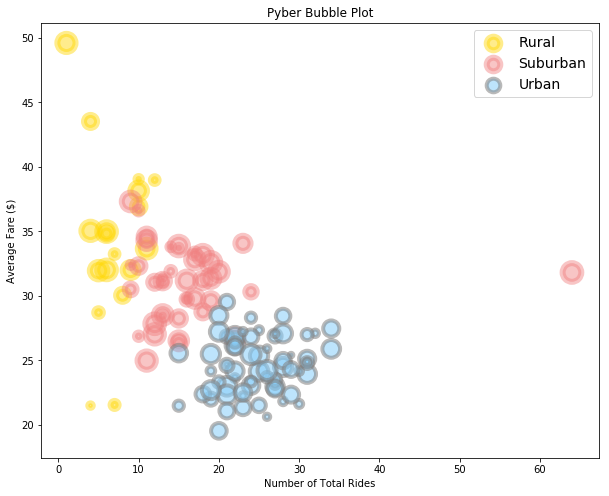

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title='Pyber Bubble Plot', ylabel='Average Fare ($)', xlabel='Number of Total Rides')
rural = ax.scatter(xr, yr, s=z*5, color='gold', alpha = 0.45, linewidth=6)
suburban = ax.scatter(xs, ys, s=z*5, color='lightcoral', alpha = 0.45, linewidth=6)
urban = ax.scatter(xu, yu, s=z*5, color='lightskyblue', edgecolor='grey', alpha = 0.55, linewidth=4)
plt.legend(('Rural','Suburban','Urban'),loc='best', prop={'size': 14})

In [9]:
# Use the 'hue' argument to provide a factor variable
# sns.lmplot(x='Total Rides', y='Average Fare', data=table1, fit_reg=False, hue='t', legend=False)

    # labels:  plot titles, axes, labels, legend labels, wedge percentages, and wedge labels
    # required color scheme:  Gold, Light Sky Blue, Light Coral
    # bubble plot:  experiment with alpha, edgecolor, and linewidths
    # pie charts:  experiment with shadow, startangle, explosion

### % Total Fares by City Type

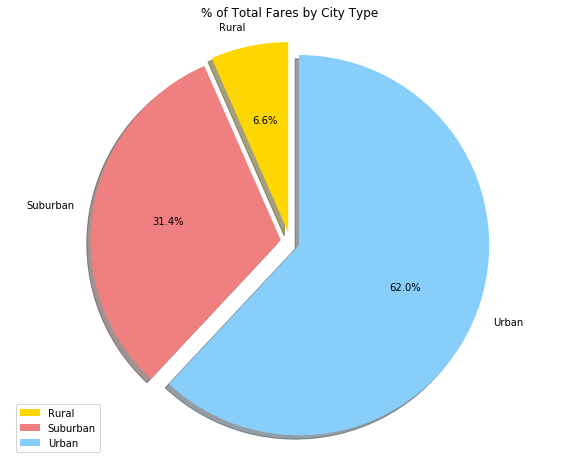

In [10]:
combined.groupby(['type']).sum()['fare']

# Data to plot
labels = 'Rural', 'Suburban', 'Urban'
sizes = [4255.09, 20335.69, 40078.34]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)  

# Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.legend(loc=3)
plt.show()

### % Total Rides by City Type

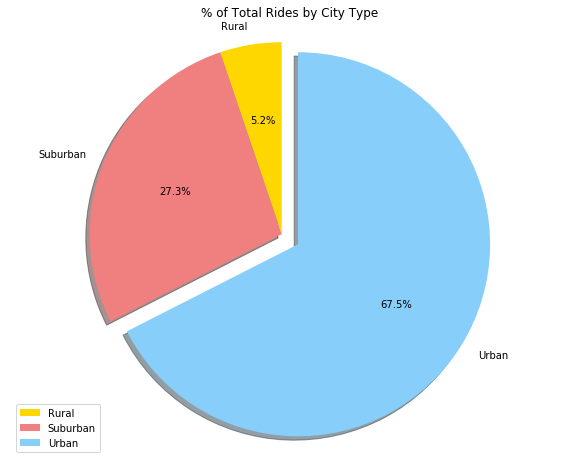

In [11]:
combined.groupby(['type']).count()['ride_id']

# Data to plot
labels = 'Rural', 'Suburban', 'Urban'
sizes = [125, 657, 1625]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1)  

# Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.axis('equal')
plt.legend(loc=3)
plt.show()

### % Total Drivers by City Type

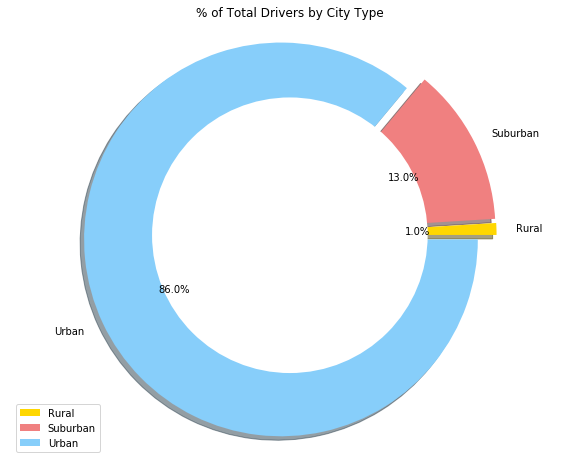

In [12]:
combined.groupby(['type']).sum()['driver_count']

# Data to plot
labels = 'Rural', 'Suburban', 'Urban'
sizes = [727, 9730, 64501]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)  

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("% of Total Drivers by City Type") 
plt.axis('equal')
plt.legend(loc=3)
plt.show()